In [25]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
movies = pd.read_csv('movies_scraping.csv')

Stage 1: Scraping of search page

Stage 2: scraping within each page to get a movie record

Stage 3: cleaning of the data set using pandas and numpy

Stage 4: What can we do with this dataset? Next steps?

In [28]:
movies

,release_month,release_year,country,language,production_co,runtime,budget,gross_usa,director,rating,...,Family,Musical,Mystery,Romance,Fantasy,History,Sci-Fi,Thriller,Music,War
0,March,2016,USA,English,Warner Bros.,151.0,250000000.0,330360194.0,Zack Snyder,65.0,...,0,0,0,0,0,0,1,0,0,0
1,February,2016,USA,English,Pyramania,127.0,140000000.0,31153464.0,Alex Proyas,54.0,...,0,0,0,0,1,0,0,0,0,0
2,June,2016,UK,English,Metro-Goldwyn-Mayer (MGM),106.0,20000000.0,56245075.0,Thea Sharrock,74.0,...,0,0,0,1,0,0,0,0,0,0
3,November,2016,Australia,English,Cross Creek Pictures,139.0,40000000.0,67209615.0,Mel Gibson,81.0,...,0,0,0,0,0,1,0,0,0,1
4,August,2016,USA,English,Atlas Entertainment,123.0,175000000.0,325100054.0,David Ayer,60.0,...,0,0,0,0,1,0,1,0,0,0
5,September,2017,UK,English,Twentieth Century Fox,141.0,104000000.0,100234838.0,Matthew Vaughn,67.0,...,0,0,0,0,0,0,0,0,0,0
6,December,2017,USA,English,Chernin Entertainment,105.0,84000000.0,174340174.0,Michael Gracey,76.0,...,0,1,0,0,0,0,0,0,1,0
7,November,2017,USA,English,Warner Bros.,120.0,300000000.0,229024295.0,Zack Snyder,64.0,...,0,0,0,0,1,0,1,0,0,0
8,September,2017,USA,English,New Line Cinema,135.0,35000000.0,327481748.0,Andy Muschietti,73.0,...,0,0,0,0,0,0,0,0,0,0
9,September,2018,USA,English,Atomic Monster,96.0,22000000.0,117450119.0,Corin Hardy,53.0,...,0,0,1,0,0,0,0,1,0,0


### My New Proposal

- explore and plot features 
    - figure out what is interesting and what we can actually use
- model on what we have explored and decided can be used
- talk about how we can futher develop this data set
    - porpose new classification method for directors, actors, writers. Too many to one hot encode (unless we were to search only based on a finite list of actors)

### Plot Distribution of the Budget

### GENRES

WE HAVE QUESTIONS for this data set

- we probably want to ask questions about how these features are reported. 3 genres listed probably has more to do with the marketing of the movie than it does with any artistic impulse. 
    - one way we could test this is by seeing if certain production companies are associated with having more of the genre things populated. 
    - we could also plot number of genre against the budget and/or the earnings of the film.
- once some questions are answered with regard to how genre is reported, it would be interesting to see if certain combinations of genre lead to a more profitable film
    - can do correlation stuff
    - but can ALSO try to predict budget given what kind of genre it is. 
        - MAYBE make features for genre and all the other features I'm interested in and try one round of prediction, just the one. And all the other plotting and stuff builds to this

### review_count
- very interested in how review count compares to the budget and the earnings. 
- usable as a variable

### Release Month and Year
- interseting to see what time of the year something comes out. An important indicator of how many people see it. Lot of big budget stuff usually happens in the summer and in december


### director, star, writer
-  we would love to work with these features, there is a lot to be explored in the interplay between directors, writers, actors, and their collabvorations
    - as these features stand, there are just way to many actors and directors to one hot encode all of them. 

- it would be useful in a business context to have a deeper, data-driven understanding of what kinds of collaborations lead to succesful films.  
    - propose a target of dollar made per dollar spent???? prettttttyyy neat
    - this would take a complete rethinkin of the way films are 'rated'. As data scientists, we have the power to do this with real, data-driven insights
- If we could define a classification system for directors
    - big/low budegt
    - weighted by number of films made
- come up with something similar for actors and writers
    

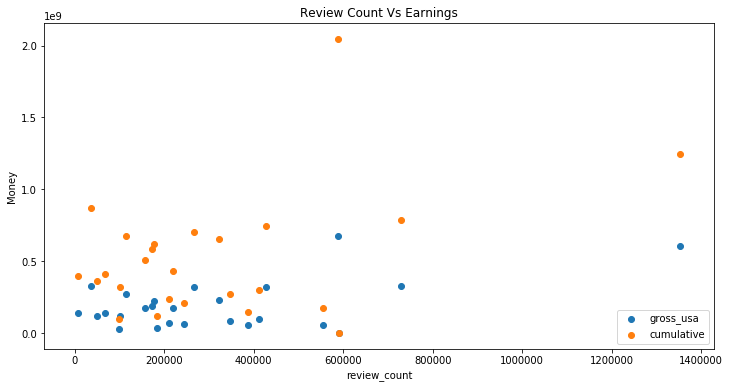

In [47]:
fig = plt.figure(figsize = (12, 6))

plt.scatter(movies['review_count'], movies['gross_usa'].sort_values(), label = 'gross_usa')
#plt.scatter(movies['review_count'], movies['open_week'], label = 'open_week')
plt.scatter(movies['review_count'], movies['cumulative'].sort_values(), label = 'cumulative')

plt.xlabel('review_count')
plt.ylabel('Money')
plt.title('Review Count Vs Earnings')
plt.legend(loc="lower right")

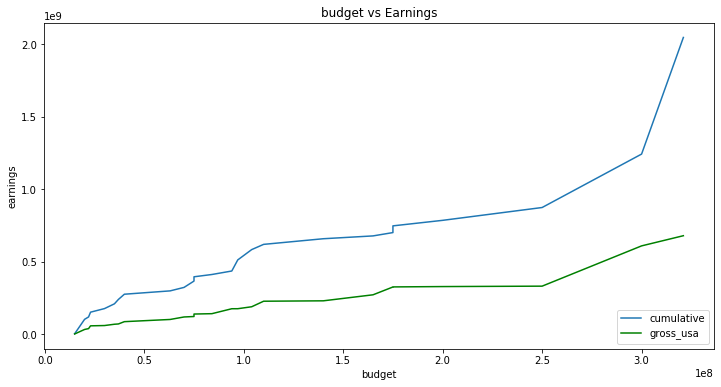

In [69]:
fig = plt.figure(figsize = (12, 6))

plt.plot(movies['budget'].sort_values(), movies['cumulative'].sort_values(), label = 'cumulative')
plt.plot(movies['budget'].sort_values(), movies['gross_usa'].sort_values(), 'g', label = 'gross_usa')
#plt.plot(movies['budget'].sort_values(), movies['open_week'].sort_values(), 'r', label = 'open_week',)

plt.xlabel('budget')
plt.ylabel('earnings')
plt.title('budget vs Earnings')
plt.legend(loc="lower right")

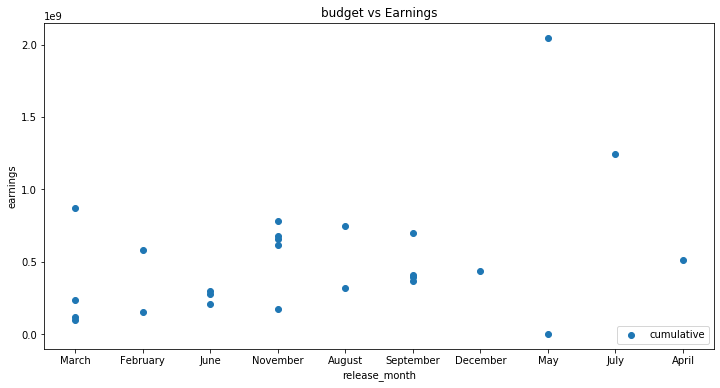

In [77]:
fig = plt.figure(figsize = (12, 6))

plt.scatter(movies['release_month'], movies['cumulative'], label = 'cumulative')
#plt.plot(movies['budget'].sort_values(), movies['gross_usa'].sort_values(), 'g', label = 'gross_usa')
#plt.plot(movies['budget'].sort_values(), movies['open_week'].sort_values(), 'r', label = 'open_week',)

plt.xlabel('release_month')
plt.ylabel('earnings')
plt.title('budget vs Earnings')
plt.legend(loc="lower right")

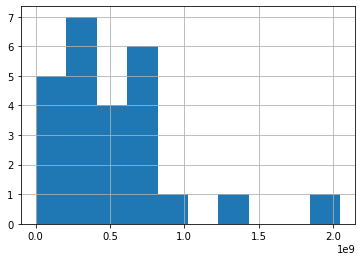

In [51]:
 movies['cumulative'].hist()

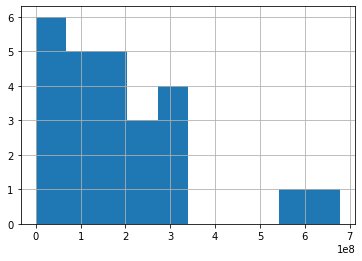

In [96]:
movies['gross_usa'].hist()

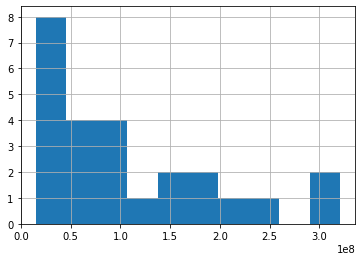

In [55]:
movies['budget'].hist()

In [78]:
movies['budget']

0     250000000.0
1     140000000.0
2      20000000.0
3      40000000.0
4     175000000.0
5     104000000.0
6      84000000.0
7     300000000.0
8      35000000.0
9      22000000.0
10     75000000.0
11    200000000.0
12     70000000.0
13     94000000.0
14     37000000.0
15    175000000.0
16     30000000.0
17     23000000.0
18    110000000.0
19    321000000.0
20     75000000.0
21    165000000.0
22     97000000.0
23     15000000.0
24     63000000.0
Name: budget, dtype: float64

### For Prediction

In [83]:
to_drop = ['title', 'release_month',
           'open_week', 
           'country', 
           'language', 
           'production_co', 
           'star_0',
           'star_1',
           'star_2',
           'star_3',
           'writer_0',
           'writer_1',
           'writer_2',
           'director']
movies.drop(to_drop, axis=1) # scale this for prediction on cumulative or gross_usa

,release_year,runtime,budget,gross_usa,rating,review_count,cumulative,Adventure,Animation,Biography,...,Family,Musical,Mystery,Romance,Fantasy,History,Sci-Fi,Thriller,Music,War
0,2016,151.0,250000000.0,330360194.0,65.0,591413.0,8.736349e+08,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2016,127.0,140000000.0,31153464.0,54.0,98286.0,1.506809e+08,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2016,106.0,20000000.0,56245075.0,74.0,184930.0,2.083142e+08,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2016,139.0,40000000.0,67209615.0,81.0,386225.0,1.753024e+08,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,2016,123.0,175000000.0,325100054.0,60.0,555709.0,7.468469e+08,1,0,0,...,0,0,0,0,1,0,1,0,0,0
5,2017,141.0,104000000.0,100234838.0,67.0,244315.0,4.109027e+08,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2017,105.0,84000000.0,174340174.0,76.0,209713.0,4.349932e+08,0,0,1,...,0,1,0,0,0,0,0,0,1,0
7,2017,120.0,300000000.0,229024295.0,64.0,347561.0,6.579243e+08,1,0,0,...,0,0,0,0,1,0,1,0,0,0
8,2017,135.0,35000000.0,327481748.0,73.0,411748.0,7.004493e+08,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2018,96.0,22000000.0,117450119.0,53.0,102287.0,3.655501e+08,0,0,0,...,0,0,1,0,0,0,0,1,0,0
